- 현재 과제


1.   ㅇㅇㅇ 모든 데이터 합치기
2.   ISBN 제대로 로드하기
3. 코사인 유사도 시험
3.   요약본 토픽 분석 데이터

#데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd
import os
path = "/content/drive/MyDrive/교보데이터 박병석 원본"

csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]

df_original = pd.concat([pd.read_csv(os.path.join(path, file), encoding="cp949") for file in csv_files],ignore_index=False)
df_original.head(3)

,책 이름,작가,장르,ISBN,책 소개,Unnamed: 5,Unnamed: 6
0,모순,양귀자,국내도서\n > \n소설\n > \n한국소설\n > \n한국소설일반,9.790000e+12,※본 도서의 표지 색상은 2쇄를 주기로 변경됩니다. 등록된 이미지와 다른 색의 표지...,NaN,NaN
1,죽이고 싶은 아이 2,이꽃님,국내도서\n > \n청소년\n > \n청소년 소설\n > \n한국,9.790000e+12,“이 이야기를 쓰지 않고서는 다른 작품을 쓰기 어렵겠다고 생각했다.”한국 청소년 문...,NaN,NaN
2,우리에게 남은 시간 46일,이설,국내도서\n > \n소설\n > \n한국소설\n > \n한국소설일반,9.790000e+12,"〈우리에게 남은 시간이 46일〉 이 소설은 시한부인 해인의 곁에서 슬퍼하며, 끝까지...",NaN,NaN


#데이터 전처리

In [53]:
#해커스 책 때문에 잘못 만들어진 열 삭제
df = df_original.drop(columns=['Unnamed: 5', 'Unnamed: 6'], axis=1)
df.head()

,책 이름,작가,장르,ISBN,책 소개
0,모순,양귀자,국내도서\n > \n소설\n > \n한국소설\n > \n한국소설일반,9.790000e+12,※본 도서의 표지 색상은 2쇄를 주기로 변경됩니다. 등록된 이미지와 다른 색의 표지...
1,죽이고 싶은 아이 2,이꽃님,국내도서\n > \n청소년\n > \n청소년 소설\n > \n한국,9.790000e+12,“이 이야기를 쓰지 않고서는 다른 작품을 쓰기 어렵겠다고 생각했다.”한국 청소년 문...
2,우리에게 남은 시간 46일,이설,국내도서\n > \n소설\n > \n한국소설\n > \n한국소설일반,9.790000e+12,"〈우리에게 남은 시간이 46일〉 이 소설은 시한부인 해인의 곁에서 슬퍼하며, 끝까지..."
3,홍학의 자리,정해연,국내도서\n > \n소설\n > \n한국소설\n > \n미스터리/스릴러소설,9.790000e+12,“이 행복이 영원할 거라고 생각한 적은 없었다.그러나 이런 끝을 상상한 적도 없었다...
4,죽이고 싶은 아이,이꽃님,국내도서\n > \n청소년\n > \n청소년 소설\n > \n한국,9.790000e+12,『세계를 건너 너에게 갈게』 작가 이꽃님 신작“팩트는 중요하지 않아. 사람들이 믿는...


In [54]:
#책 소개가 없는 데이터 제거\
df = df.dropna(subset=['책 소개'])
df = df.reset_index(drop=True)
df.head(3)

,책 이름,작가,장르,ISBN,책 소개
0,모순,양귀자,국내도서\n > \n소설\n > \n한국소설\n > \n한국소설일반,9.790000e+12,※본 도서의 표지 색상은 2쇄를 주기로 변경됩니다. 등록된 이미지와 다른 색의 표지...
1,죽이고 싶은 아이 2,이꽃님,국내도서\n > \n청소년\n > \n청소년 소설\n > \n한국,9.790000e+12,“이 이야기를 쓰지 않고서는 다른 작품을 쓰기 어렵겠다고 생각했다.”한국 청소년 문...
2,우리에게 남은 시간 46일,이설,국내도서\n > \n소설\n > \n한국소설\n > \n한국소설일반,9.790000e+12,"〈우리에게 남은 시간이 46일〉 이 소설은 시한부인 해인의 곁에서 슬퍼하며, 끝까지..."


In [55]:
#장르 \n 제거
df['장르'] = df['장르'].str.replace('\n', '')
df.head(3)

,책 이름,작가,장르,ISBN,책 소개
0,모순,양귀자,국내도서 > 소설 > 한국소설 > 한국소설일반,9.790000e+12,※본 도서의 표지 색상은 2쇄를 주기로 변경됩니다. 등록된 이미지와 다른 색의 표지...
1,죽이고 싶은 아이 2,이꽃님,국내도서 > 청소년 > 청소년 소설 > 한국,9.790000e+12,“이 이야기를 쓰지 않고서는 다른 작품을 쓰기 어렵겠다고 생각했다.”한국 청소년 문...
2,우리에게 남은 시간 46일,이설,국내도서 > 소설 > 한국소설 > 한국소설일반,9.790000e+12,"〈우리에게 남은 시간이 46일〉 이 소설은 시한부인 해인의 곁에서 슬퍼하며, 끝까지..."


In [56]:
#ISBN float64 -> int
df['ISBN'] = df['ISBN'].astype('int64')
print(df['ISBN'].iloc[100], df['ISBN'].dtype)
print(df['ISBN'].iloc[99], df['ISBN'].dtype)
#ISBN 데이터가 중간이 사라져 다 같은 값으로 불러들여짐

9790000000000 int64
9790000000000 int64


#책 소개 - 요약, 정제, 불용어 제거 - 명사추출

In [57]:
from transformers import PreTrainedTokenizerFast, BartForConditionalGeneration

# Load Model and Tokenizer
tokenizer = PreTrainedTokenizerFast.from_pretrained("EbanLee/kobart-summary-v3")
model = BartForConditionalGeneration.from_pretrained("EbanLee/kobart-summary-v3")

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


In [ ]:
# Encoding
for i in range(0, len(df)):
  input_text = df.loc[i, '책 소개']
  inputs = tokenizer(input_text, return_tensors="pt", padding="max_length", truncation=True, max_length=1026)

  # Generate Summary Text Ids
  summary_text_ids = model.generate(
  input_ids=inputs['input_ids'],
  attention_mask=inputs['attention_mask'],
  bos_token_id=model.config.bos_token_id,
  eos_token_id=model.config.eos_token_id,
  length_penalty=1.0,
  max_length=500,
  min_length=12,
  num_beams=6,
  repetition_penalty=1.5,
  no_repeat_ngram_size=15,
  )

  # Decoding Text Ids
  result = tokenizer.decode(summary_text_ids[0], skip_special_tokens=True)
  print(result)
  df.loc[i, '요약본'] = result

정제

In [68]:
#책 소개 특수문자와 \n 제거.
df['요약본'] = df['요약본'].str.replace(r'[^\w\s]', '', regex=True)
df['요약본'] = df['요약본'].str.replace(r'[\n]', ' ', regex=True)
df['요약본'] = df['요약본'].apply(lambda x : ' '.join([word for word in x.split() if len(word)>2]))
df['요약본']

,요약본
0,양귀자 소설의 보여준 베스트셀러 모순은 스물다섯 미혼여성 안진진을 모순으로 가득한 ...
1,이꽃님의 죽이고 아이는 압도적인 몰입감과 휘몰아치는 전개로 수십만 청소년 독자를 단...
2,우리에게 시간이 46일은 우현의 사랑이야기를 우리에게 소중함과 사랑의 되새기게 해주...
3,정해연 작가의 신작이 엘릭시르에서 출간됐다 홍학의 자리는 누구나 궁금해할 설정과 이...
4,죽이고 아이는 여고생의 죽음이라는 평범하지 이야기를 독자들에게 진실과 믿음에 이야기...
...,...
1405,nan
1406,nan
1407,nan
1408,nan


한국어 불용어 제거

In [62]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 35.5 MB/s eta 0:00:00


In [63]:
import konlpy
from konlpy.tag import Okt

In [69]:
#형태소 분석 후 명사 중 불용어에 포함되지 않은 것만 저
#형태소
Okt = konlpy.tag.Okt()
komoran = konlpy.tag.Komoran()

#불용어 사전
stopword_data_path = '/content/drive/MyDrive/교보데이터 박병석 원본/stopwords-ko.txt'
with open(stopword_data_path, 'r', encoding='utf-8') as f:
  stopwords = [line.strip() for line in f.readlines()]

for i in range(len(df['요약본'])):
  Okt_morphs = Okt.pos(df['요약본'].loc[i])

  temp = []
  for word, pos in Okt_morphs:
    if pos == 'Noun' and word not in stopwords and len(word)>1: #명사, 불용어 비포함, 2글자 이상
        temp.append(word)

  df.loc[i, '요약본-명사추출'] = ' '.join(temp)


In [71]:
costest_df = df['요약본-명사추출'][0:5]
costest_df

,요약본-명사추출
0,양귀자 소설 베스트셀러 모순 스물 미혼여성 모순 인생 작품 모순 인생 사람 인생 계...
1,꽃님 압도 몰입 전개 청소년 독자 단숨 이야기 진실 믿음 이야기 이야기 산산조각 이...
2,우현 사랑 이야기 사랑 인상 작품
3,정해 작가 신작 엘릭시르 홍학 설정 이야기 전개 최고 작품 작품 반전 충격 반전 작...
4,여고생 죽음 이야기 독자 진실 믿음 이야기 독자 혼란 전개 독자 몰입 선사 대로 사...


저장

In [ ]:
output_path = r"/content/drive/MyDrive/교보데이터 박병석 원본/unity_data.csv"
book_data.to_csv(output_path, index=False, encoding="cp949")
print("저장 완료")

#책 소개 요약 - LDA 분석 - 토픽 추출

In [ ]:
from gensim import corpora

polished_doc = df['Polished'].apply(lambda x : x.split()).tolist()

#Bag of words 만들기
dictionary = corpora.Dictionary(polished_doc)
#빈도 1인단어, 너무자주나오는거 제거. 이걸 하니 모든 토픽에 공통적으로 들어가있던 '작품'같은 의미없는 단어 사라짐.
dictionary.filter_extremes(no_below=2, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in polished_doc]

In [ ]:
print(dictionary[60], len(dictionary))

창조 2414


#LDA 모델 훈련

lda 모델 만드는 동시에 최적의 토픽 개수 찾기 : https://m.blog.naver.com/j7youngh/222929522859

In [ ]:
import gensim
from gensim.models import CoherenceModel

NUM_TOPICS = 10
CHUNKSIZE = 2000      #한번에 트레이닝 처리할 문서의 개수
PASSES = 15         #전체 코퍼스 트레이닝 횟수
ITERATIONS = 3     #문서 당 반복 횟수
EVAL_EVERY = 1

coherence_score = []

for i in range(50,150,5):
  ldamodel = gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary,
                                           passes=PASSES,
                                           num_topics = i,
                                           chunksize=CHUNKSIZE,
                                           iterations = ITERATIONS,
                                           eval_every = EVAL_EVERY)
  coherence_model = CoherenceModel(model = ldamodel, texts = polished_doc, dictionary = dictionary, coherence = 'c_v')
  coherence_lda = coherence_model.get_coherence()

  print(i, "Coherence Score : ", coherence_lda)
  coherence_score.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


50 Coherence Score :  0.42083585676434615
55 Coherence Score :  0.4127508458042261
60 Coherence Score :  0.42411184879715946
65 Coherence Score :  0.4135004840637791
70 Coherence Score :  0.41480946869033797
75 Coherence Score :  0.42187355635982754
80 Coherence Score :  0.43387010515164526
85 Coherence Score :  0.415409760987709
90 Coherence Score :  0.3976991346069418
95 Coherence Score :  0.397737982565149
100 Coherence Score :  0.4031466183314832
105 Coherence Score :  0.41836685831263126
110 Coherence Score :  0.4216028423597195
115 Coherence Score :  0.39866128037698706
120 Coherence Score :  0.4350844573624336
125 Coherence Score :  0.39931946075353886
130 Coherence Score :  0.40696162238401246
135 Coherence Score :  0.4021234193633985
140 Coherence Score :  0.3937150297095628
145 Coherence Score :  0.39242776627096426


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


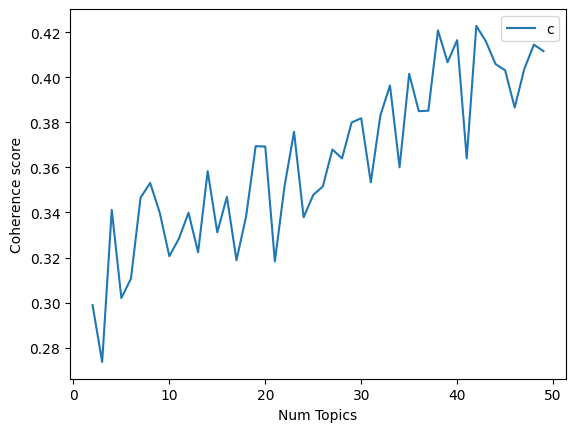

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(2,50), coherence_score)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
coherence_score[20:25]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.34883815321299294,
 0.3621785375234808,
 0.34191816901407374,
 0.3193257772679857,
 0.3301893373634972]

토픽별 (기여도 * 단어) 출력

In [ ]:
topics = ldamodel.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.025*"카프카" + 0.020*"세계" + 0.019*"사랑" + 0.018*"그녀" + 0.014*"감정" + 0.011*"시몽"')
(1, '0.019*"사랑" + 0.018*"작가" + 0.017*"삼국지" + 0.016*"헤르" + 0.015*"인간" + 0.015*"헤세"')
(2, '0.022*"문학상" + 0.018*"문학" + 0.017*"작가" + 0.012*"최고" + 0.012*"세계" + 0.011*"주년"')
(3, '0.015*"사건" + 0.014*"작가" + 0.012*"시작" + 0.011*"미스터리" + 0.010*"인생" + 0.010*"아버지"')
(4, '0.019*"작가" + 0.012*"인간" + 0.012*"신화" + 0.010*"우주" + 0.010*"인류" + 0.009*"우정"')
(5, '0.011*"엄마" + 0.010*"동물" + 0.010*"세계" + 0.009*"사회" + 0.009*"혁명" + 0.009*"인간"')
(6, '0.016*"여성" + 0.012*"출산" + 0.011*"라우" + 0.010*"네스" + 0.009*"사회" + 0.009*"기쁨"')
(7, '0.019*"사람" + 0.012*"문학" + 0.010*"역사" + 0.010*"사랑" + 0.009*"독자" + 0.008*"돈키호테"')
(8, '0.025*"독자" + 0.019*"세계" + 0.009*"마을" + 0.008*"베르베르" + 0.007*"왕자" + 0.007*"역사"')
(9, '0.017*"사랑" + 0.016*"편의점" + 0.014*"작가" + 0.014*"여성" + 0.011*"마지막" + 0.010*"최초"')


문서별 (토픽, 기여도) 출력

In [ ]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(0, 0.031413246), (1, 0.033173412), (2, 0.01070629), (3, 0.8832477), (5, 0.01232042)]
1 번째 문서의 topic 비율은 [(1, 0.05541218), (2, 0.04150626), (3, 0.11006256), (7, 0.21157745), (8, 0.5622176)]
2 번째 문서의 topic 비율은 [(0, 0.019029101), (1, 0.589646), (6, 0.013088803), (7, 0.010824933), (8, 0.02569885), (9, 0.309547)]
3 번째 문서의 topic 비율은 [(3, 0.9705852)]
4 번째 문서의 topic 비율은 [(0, 0.015624004), (1, 0.039788827), (2, 0.03259355), (3, 0.15773618), (4, 0.13479444), (6, 0.033743866), (7, 0.048067156), (8, 0.4967125), (9, 0.03606393)]


원본 데이터 프레임에 저장하기

In [ ]:
#데이터 프레임 저장
for i, topic_list in enumerate(ldamodel[corpus]):
  max_topic, max_rate = 0, 0.0

  for j, rate in enumerate(topic_list):
    if len(topic_list) == 1 :
      max_topic = topic_list[0][0]
      max_rate = topic_list[0][1]
    else:
      if topic_list[j][1] > max_rate:
        max_topic = topic_list[j][0]
        max_rate = topic_list[j][1]

  df.loc[i, 'Topic'] = int(max_topic)
  df.loc[i, 'Value'] = float(max_rate)



토픽별 분류된거 출력해보기

In [ ]:
#문서별 토픽 데이터 정리 t:토픽, start,num : 시작, 출력개수
topic_num = 0
start, num = 0, 100

t = df[df['Topic'] == topic_num]

#pd.set_option('display.max_colwidth', None)
# 텍스트 출력 설정을 원래 상태로 되돌리기
pd.reset_option('display.max_colwidth')

t.iloc[start:start+num][['책 이름','Polished']]

,책 이름,Polished
25,포스 윙,두뇌 최고 무기 상대 바이올렛 팬덤 시작 치명 매력 세계 드래곤 선택 자만 바스 아...
47,용의자 X의 헌신,살인 수식 도전 물리학자 추적 시작 게이고 문학 정수 용의자 번역가 번역 손질 원작...
56,설국,설국 문학사 최고 서정 소설 플롯 작품 감각 문체 묘사 독자 명작 작가 작품 모티프...
104,브람스를 좋아하세요,사강 사랑 프랑수아 사강 작품 브람스 방황 심리 중심 그녀 사랑 감정 연결 로제 시...
132,변신 시골의사,세기 실존 주의 문학 선구자 카프카 문학 신화 불멸 단편 소시민 불안 절망 그것 일상
151,인형의 집,여성 해방 문제 최초 헨리크 입센 대표 여성 참다운 고민 헨리크 입센 제작 인형 해...
171,돌연한 출발,바다 도끼 여야 프란츠 카프카 출구 재앙 세계 구원 이방인 세기 문학 프란츠 카프카...
172,8월에 만나요,가브리엘 가르시아 마르케스 요가 주기 생일 민음사 한국어 마르케스 아들 프롤로그 마...
181,디 에센셜: 프란츠 카프카(교보문고 특별판),오클라호마 극장 열차 이방인 사랑 구원 카프카 여정 서거 주기 프란츠 카프카 마지막...
193,갈매기에게 나는 법을 가르쳐준 고양이,세계 루이스 베다 대표 몸집 고양이 소르바스 어미 갈매기 이야기 초등 학년 교과서 ...


#시각화

In [ ]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.7 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [ ]:
len(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


260

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
